# Q1. Downloading the data

In [1]:
import pandas as pd

In [2]:
df_jan = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df_feb = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [3]:
# Q1
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

# Q2. Computing duration

In [4]:
# create new column of duration (in minutes)
df_jan['duration'] = df_jan.tpep_dropoff_datetime - df_jan.tpep_pickup_datetime
df_jan.duration = df_jan.duration.apply(lambda td: td.total_seconds() / 60)

In [5]:
# Q2
df_jan.duration.std()

42.594351241920904

# Q3. Dropping outliers

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df_jan.duration.describe()

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

In [8]:
nrows = df_jan.shape[0]
nrows

3066766

In [9]:
# filter duration of 1-60 minutes
df_jan = df_jan[(df_jan.duration >= 1) & (df_jan.duration <= 60)]

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

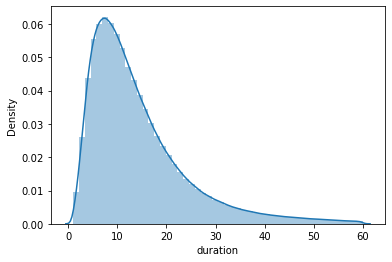

In [10]:
sns.distplot(df_jan.duration)

In [11]:
#Q3
df_jan.duration.count() / nrows

0.9812202822125979

# Q4. One-hot encoding

In [12]:
from sklearn.feature_extraction import DictVectorizer

In [13]:
# one hot encoding
categorical = ['PULocationID', 'DOLocationID']
train_dict = df_jan[categorical].astype(str).to_dict(orient="records")

dv = DictVectorizer()
X_train = dv.fit_transform(train_dict)

In [14]:
X_train

<3009173x515 sparse matrix of type '<class 'numpy.float64'>'
	with 6018346 stored elements in Compressed Sparse Row format>

In [15]:
# Q4
print(f"Number of explicitly-stored values={X_train.getnnz()}")
print(f"Number of rows={X_train.shape[0]}")
print(f"Number of columns={X_train.shape[1]}")

Number of explicitly-stored values=6018346
Number of rows=3009173
Number of columns=515


# Q5. Training a model

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [17]:
target = 'duration'
y_train = df_jan[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
# Q5
y_pred = lr.predict(X_train)
mean_squared_error(y_train, y_pred, squared=False)

7.6492610279057605

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


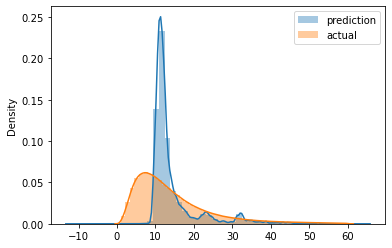

In [19]:
# visualize
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

# Q6. Evaluating the model

In [20]:
df_feb['duration'] = (df_feb.tpep_dropoff_datetime - df_feb.tpep_pickup_datetime).dt.total_seconds() / 60

In [21]:
df_feb = df_feb[(df_feb.duration >= 1) & (df_feb.duration <= 60)]

In [22]:
val_dict = df_feb[categorical].astype("str").to_dict(orient="records")
X_val = dv.transform(val_dict)
y_val = df_feb["duration"]

In [23]:
# Q6
y_pred = lr.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)

7.81183265470218